<a href="https://colab.research.google.com/github/mohangiri1/Physics/blob/main/TheoreticalSimulation/GaBiAs_bandgap_various_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Band Gap of $GaBi_xAs_{1-x}$ at 300 K obtained using Valence Band Anti-Crossing Model, Virtual Crystal Approximation and Density Functional Theory.

Some part of the formula here are based on paper https://onlinelibrary.wiley.com/doi/abs/10.1002/pssb.201350311.

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def VBAC(x):
  '''
  Calculates the upward shift of the heavy hole at the gamma point with the GaBi fraction x based on Valence Band anti-crossing Model.

  parameters:
    x (float): GaBi fraction, can be calculated by Bi % /100

  returns:
    VBM (float): Valence band maximum energy in eV with respect to GaAs VBM at the gamma point.
  '''
  E_V_GaAs = 0 # VBM of GaAs (eV)
  E_Bi = -0.4 # position of Bi with respect to VBM of GaAs at the gamma point.
  C_Bi = 1.65 # Strength of coupling between Bi and valence bands of GaAs
  return ( E_V_GaAs + E_Bi + np.sqrt(( E_V_GaAs + E_Bi )**2 + 4 * x * C_Bi**2 ) )/2

def VCA(x):
  '''
  Calculates the downward shift of the conduction band at the gamma point with the GaBi fraction x based on Virtual Crystal Approximation.

  parameters:
    x (float): GaBi fraction, can be calculated by Bi % /100

  returns:
    CBM (float): conduction band minimum energy in eV with respect to GaAs CBM at the gamma point.
  '''
  E_g = 1.42 # Band Gap of GaAs at 300 K
  delta_E = 2.3 # A constant
  return E_g - delta_E * x

def DFT(x):
  '''
  Calculates the band gap of the GaBiAs calculated by using given bandgap trend obtained by DFT at various x.

  parameters:
    x (float): GaBi fraction, can be calculated by Bi % /100

  returns:
    bandgap (float): bandgap energy in eV at the gamma point.
  '''
  return 1.42 -6.79 * x

Now execute the code to get the bandgap and compare it with bandgap obtained using various method:

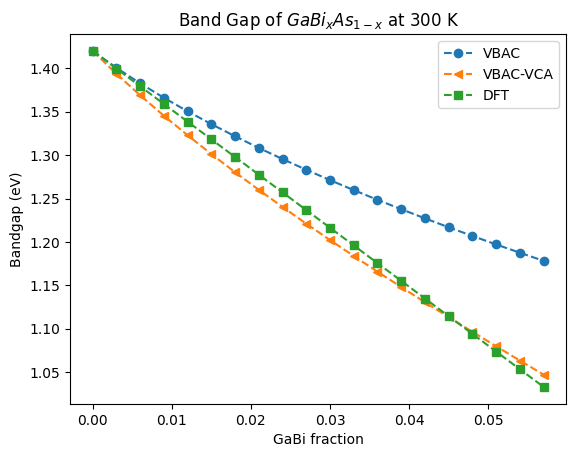

In [14]:
# Generate the % of Bi in GaBiAs
x = np.arange(0, 6, 0.3)

# Convert % of Bi in fraction of Bi
x = x/100

# VBAC upward movement of vbm
vbac = VBAC(x)

# VCA downward movement of CBM
vca = VCA(x)

# Band Gap of GaBiAs using DFT
dft = DFT(x)

# Plot and compare the different methods
plt.figure()
plt.plot(x, 1.42 - vbac, 'o--', label = 'VBAC') # Here bandgap is obtained by subtracting upward shift of VBM in GaBiAs (w.r.t GaAs) from bandgap_GaAs
plt.plot(x, vca - vbac, '<--', label = 'VBAC-VCA')
plt.plot(x, dft, 's--', label = 'DFT')
plt.xlabel('GaBi fraction')
plt.ylabel('Bandgap (eV)')
plt.legend()
plt.title('Band Gap of $GaBi_xAs_{1-x}$ at 300 K')
plt.show()